In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load grayscale image
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Error: Image not found or unable to load.")
    return img

In [22]:
# Compute and display histogram
def plot_histogram(image):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    plt.figure(figsize=(10, 4))
    plt.plot(histogram, color='black')
    plt.fill_between(range(256), histogram.ravel(), alpha=0.5, color='gray')
    plt.title("Histogram of the Grayscale Image")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")
    plt.show()

In [23]:
def analyze_brightness(image):
    avg_brightness = np.mean(image)
    print(f"Mean Brightness: {avg_brightness:.2f}")

    if avg_brightness < 80:
        print("Warning: The image is too dark.")
    elif avg_brightness > 175:
        print("Warning: The image is too bright.")
    else:
        print("The image brightness is balanced.")


In [24]:
def apply_histogram_equalization(image):
    return cv2.equalizeHist(image)

In [25]:
def negative_transformation(image):
    return 255 - image  # Inverts pixel values

In [26]:
def log_transformation(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image.astype(np.float32))
    return np.uint8(log_image)

In [27]:
def power_law_transformation(image, gamma=0.5):
    c = 255 / (np.max(image) ** gamma)
    gamma_image = c * (image.astype(np.float32) ** gamma)
    return np.uint8(gamma_image)


In [28]:
def show_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap="gray")
        ax.set_title(title)
        ax.axis("off")

    plt.show()

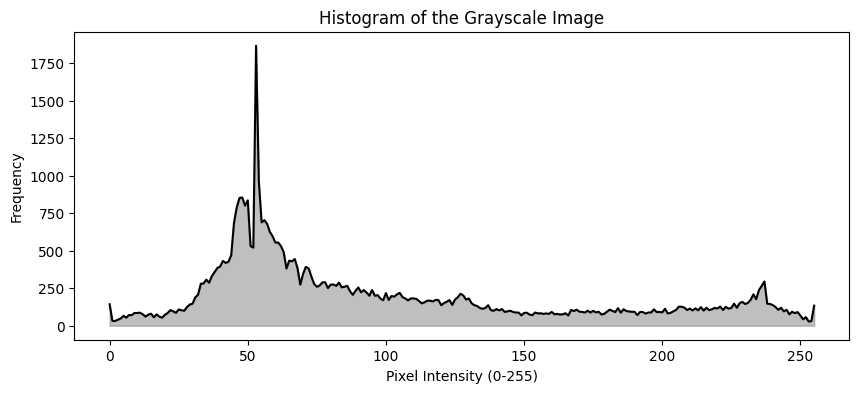

Mean Brightness: 99.73
The image brightness is balanced.


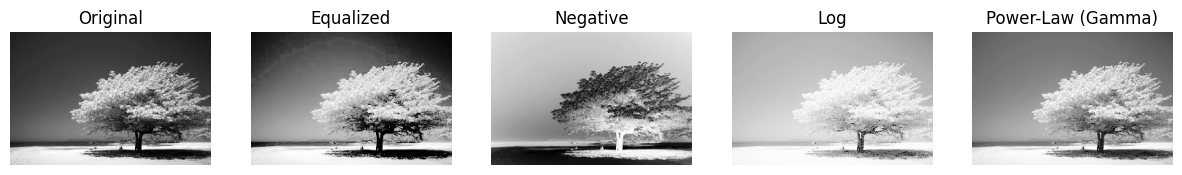

In [29]:
image_path = "/content/download.jpeg"  # Change this to your image file
grayscale_image = load_image(image_path)

plot_histogram(grayscale_image)
analyze_brightness(grayscale_image)

equalized_image = apply_histogram_equalization(grayscale_image)
negative_image = negative_transformation(grayscale_image)
log_image = log_transformation(grayscale_image)
power_law_image = power_law_transformation(grayscale_image, gamma=0.5)

show_images(
    [grayscale_image, equalized_image, negative_image, log_image, power_law_image],
    ["Original", "Equalized", "Negative", "Log", "Power-Law (Gamma)"]
)